# Jupyter Dashboards in a nutshell

This notebook demonstrates the basics of laying out and viewing a notebook as a dashboard with some simple plots and minimal interactivity. We'll use Python, a public dataset, and ipywidgets.

When complete, it will look something like this:

<img src="http://i.imgur.com/6lwBoKj.png" width="50%" />

## Setup

First, let's get setup by enabling inline plotting, disabling ugly warnings, and loading the sample dataset.

In [67]:
%matplotlib inline

In [68]:
import warnings
warnings.filterwarnings('ignore')

In [69]:
import pandas as pd
import seaborn as sns

In [70]:
raw_df = sns.load_dataset('attention')

The output of `load_dataset` is a Pandas DataFrame object. We can ask for the first few rows.

In [71]:
raw_df.head()

,Unnamed: 0,subject,attention,solutions,score
0,0,1,divided,1,2
1,1,2,divided,1,3
2,2,3,divided,1,3
3,3,4,divided,1,5
4,4,5,divided,1,4


The first two columns are subject identifiers which we can toss.

In [72]:
df = raw_df.ix[:, 2:]

Now we're left with what appears to be results from an study where participants were asked to complete some set of tasks which were then scored. Some participants had full attention on the tasks while others had to attend to some other confounding task at the same time.

In [73]:
df.head()

,attention,solutions,score
0,divided,1,2
1,divided,1,3
2,divided,1,3
3,divided,1,5
4,divided,1,4


## Exercise #1: A Static Plot

Let's say we wanted to show a non-technical user the distribution of the number of solutions and the scores assigned to those solutions between the two attention groups. We can use a pairplot to do so.

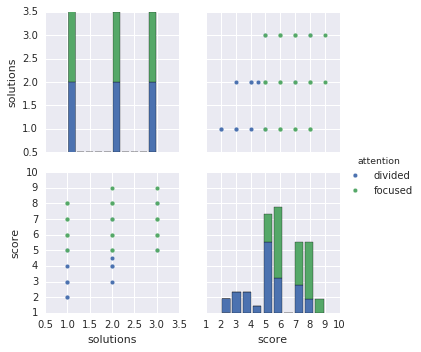

In [74]:
_ = sns.pairplot(df, hue='attention')

Now let's say we wanted to show the plot without all the code or other gorp in this notebook surrounding it.

1. Click *View -> Dashboard Layout* (or use the *View:* <i class="fa-th-large fa"></i> toolbar button that looks like a grid).
2. Click *Cell -> Dashboard -> Hide all cells*
3. Drag drop just the cells of interest back into the notebook.
4. Click *View -> Dashboard Preview* (or use the *View:* <i class="fa-dashboard fa"></i> toolbar button that looks like a car dashboard).

The notebook file captures the layout metadata. If you save this notebook and send it to colleague, she can open it and preview the dashboard if she has the notebook extension installed.

## Exercise #2: Simple Interactivity

Now let's add some simple interactivity to let the user pick which column should be used to group/colorize the data in the same plot.

Since we're in Python for this tutorial, we can use ipywidgets.

In [75]:
from ipywidgets import interact

We need a tuple of all the column names.

In [76]:
by_vals = tuple(list(df.columns))

The `@interact` decorator automatically adds a rudimentary widget for each parameter passed to a function. Here, we pass the possible list of choice to group by. The function re-runs any time the user picks a new value from the dropdown. We generate a new plot each time.

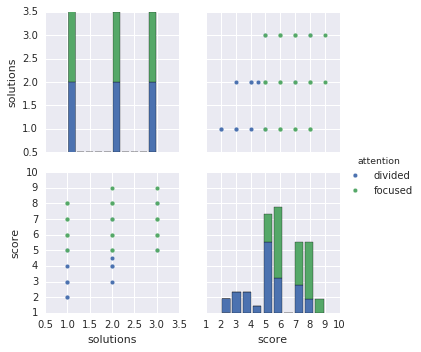

In [77]:
@interact(group_by=by_vals)
def plot_by(group_by):
    sns.pairplot(df, hue=group_by)

Again, we can switch to dashboard layout mode and show the dropdown + plot alone.

## Next Steps

* If you need to build more complicated interactivity into your notebook application, check out https://github.com/jupyter-incubator/declarativewidgets.
* If you're sticking with Python and just want more interactive plots in your notebook, try using a library like plot.ly or bokeh.
* If you're interested in deploying your notebook-dashboards as standalone applications, check out https://github.com/jupyter-incubator/dashboards_bundlers.
* If you want to see other examples of notebooks as dashboards, try the examples at http://jupyter.cloudet.xyz.